# Nama = `Ahmad Hamdani`
# Nim = `233307092`
# Kelas = `4D`

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mengimpor library untuk analisis data, manipulasi data, dan visualisasi.

In [2]:
df=pd.read_csv("data/unsupervised_5_Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

Mengganti nama kolom agar lebih pendek dan mudah digunakan.

In [7]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


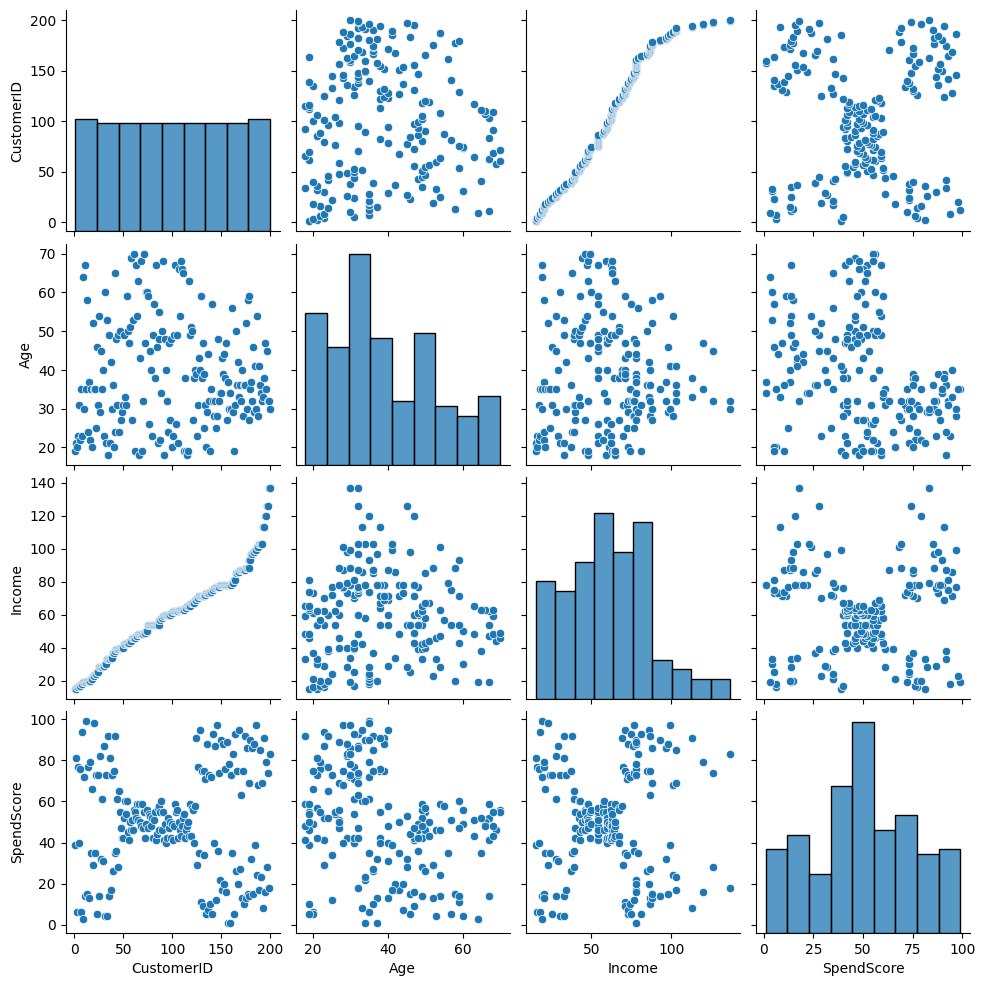

In [8]:
sns.pairplot(df)

Visualisasi hubungan antar semua pasangan fitur dalam dataset.

**From the above diagram, we can say that the customer id is not correlated with income, it's not an useful feature so we can remove that.**

In [9]:
df=df.drop(['CustomerID'],axis=1)

Menghapus kolom CustomerID karena tidak relevan untuk analisis.



In [10]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Axes: >

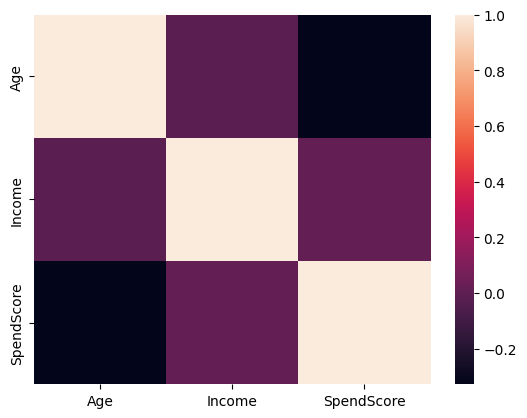

In [11]:
# sns.heatmap(df.corr())
sns.heatmap(df.corr(numeric_only=True))

Menampilkan korelasi antar fitur numerik dalam bentuk heatmap.

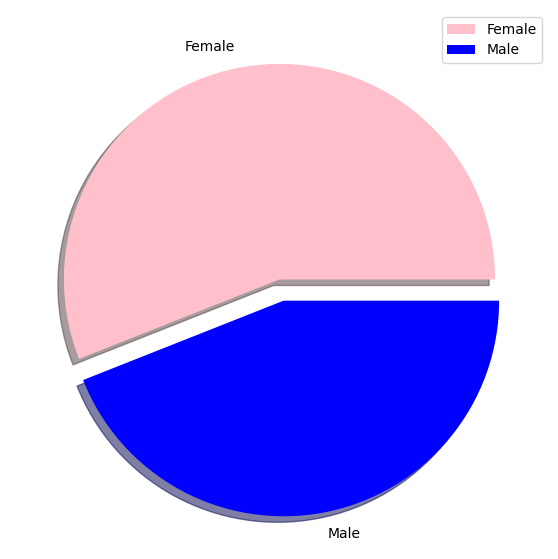

In [12]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

Menampilkan diagram pie jumlah pengunjung berdasarkan jenis kelamin.

**From the diagram we can say that females are more visiting to mall than males**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

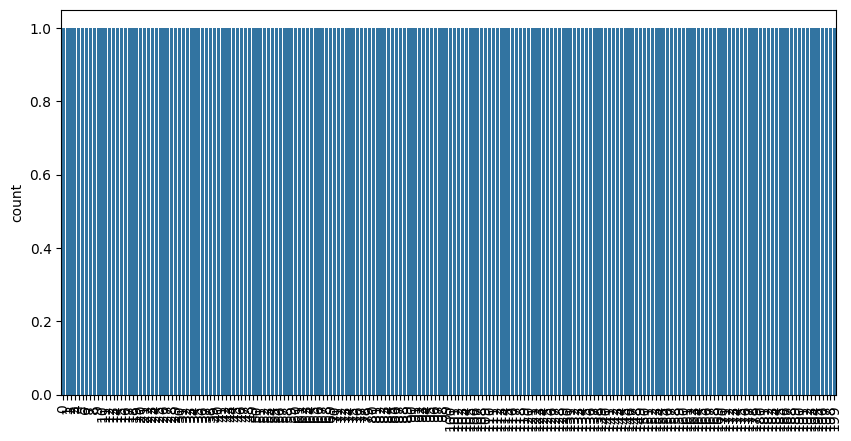

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

Menampilkan jumlah pengunjung berdasarkan usia.

**Peoples of age between 25 to 40 are mostly visiting mall than other age groups**

<Axes: xlabel='Gender', ylabel='SpendScore'>

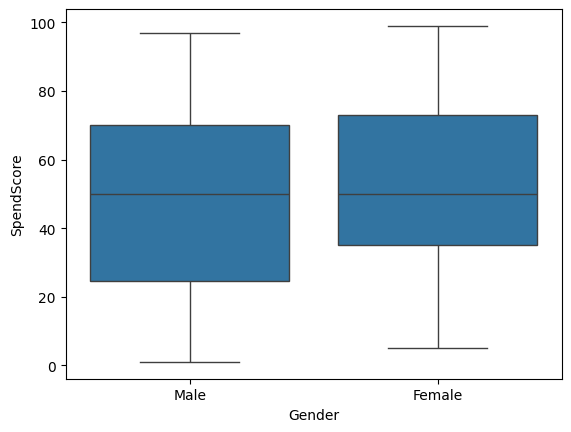

In [14]:
# sns.boxplot(df['Gender'],df['SpendScore'])
sns.boxplot(x='Gender', y='SpendScore', data=df)

Menampilkan boxplot perbandingan SpendScore antara laki-laki dan perempuan.

**This diagram shows the mean spendscore of female and male. we can observe that the mean average spend score of female is greater than male, they have higher spendscore than male,and their least spendscore is greater than males least spendscore**

<Axes: ylabel='count'>

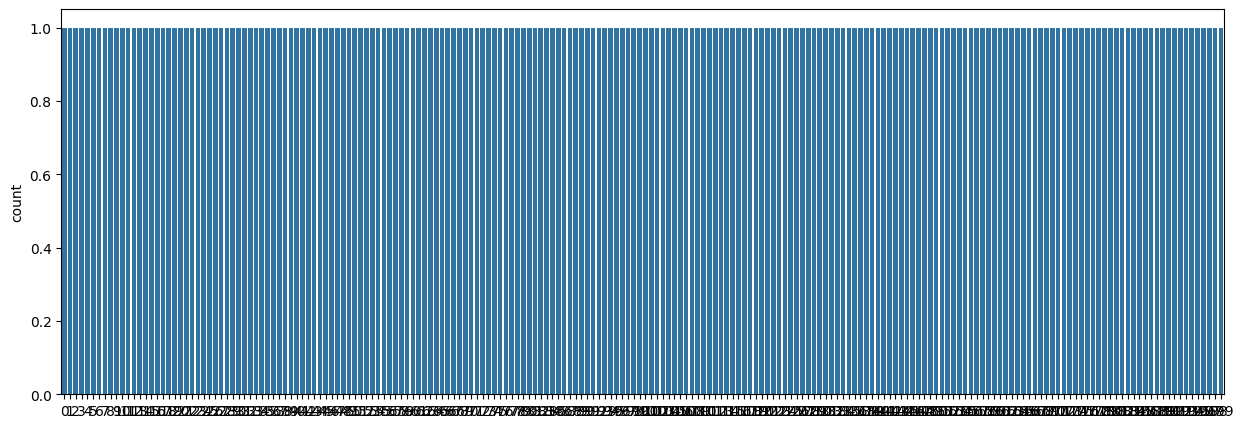

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df['Income'])


Menampilkan jumlah pengunjung berdasarkan income tahunan.

**Peoples of salary 54k and 78k are the mostly visited persons in mall.**

Text(0, 0.5, 'Spendscore')

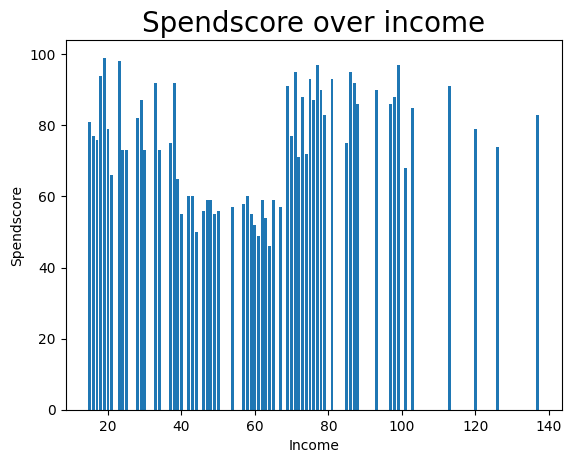

In [16]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

Menampilkan hubungan antara income dan spend score dalam bentuk bar chart.

**Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score**

# **Density Based Spacial Clustering of Applications with noise (DBSCAN)**

**We are going to use the DBSCAN  for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.**

In [17]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
x=df.iloc[:,[2,3]].values

In [19]:
x.shape

(200, 2)

Menyiapkan data fitur numerik Income dan SpendScore sebagai input clustering.

In [20]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [21]:
model=db.fit(x)

**Inisialisasi dan Pelatihan DBSCAN**
1. Mengimpor DBSCAN dari sklearn.cluster.

2. Membuat objek db dengan parameter:

    - eps=3: radius maksimum tetangga untuk setiap titik (berapa jauh titik lain bisa dianggap “tetangga”).

    - min_samples=4: jumlah minimum titik dalam radius eps untuk membentuk core point.

    - metric='euclidean': menggunakan jarak Euclidean untuk menghitung kedekatan antar titik.

3. it(x) melakukan pelatihan (clustering) pada data x.

In [22]:
label=model.labels_

In [23]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

**Mengambil Label Cluster**  
Menerapkan algoritma DBSCAN untuk clustering dan menghasilkan label cluster.
1. Mengambil label hasil clustering dari model.

2. Nilai label dapat berupa:

    - Angka (misal 0, 1, 2...) untuk tiap cluster.

    - -1 untuk outlier (titik yang tidak termasuk dalam cluster mana pun).



In [24]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


**Identifikasi Core Points**  
- np.zeros_like(label, dtype=bool) membuat array boolean dengan ukuran sama seperti label, semuanya False.

- db.core_sample_indices_ mengandung indeks titik yang dianggap core point.

- Baris kedua menyetel nilai True pada sample_cores di posisi core point.

**Hitung Jumlah Cluster**  
- set(label) menghilangkan duplikasi label.

- Jika -1 (outlier) ada, kita kurangi 1 karena itu bukan cluster.

- Menampilkan jumlah total cluster terdeteksi.

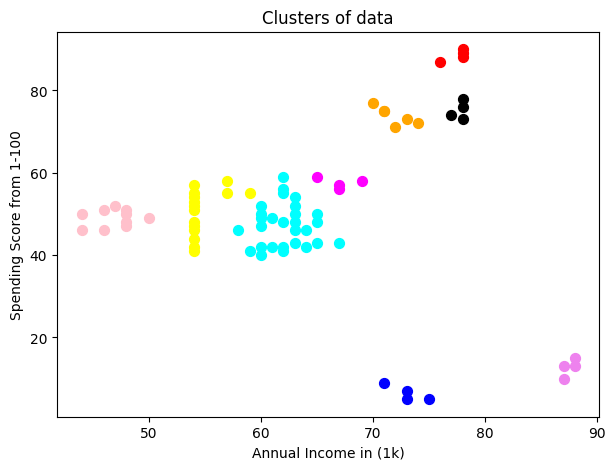

In [25]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()



**Prediksi Label dan Visualisasi DBSCAN**

- fit_predict() seperti fit() tetapi langsung mengembalikan label prediksi.

- Visualisasi hasil clustering dengan plt.scatter(), satu per satu untuk setiap cluster.

- Menggunakan warna berbeda untuk membedakan cluster (0–8).

- xlabel, ylabel, dan title memberi konteks sumbu.

# HIERARCHICAL CLUSTERING****

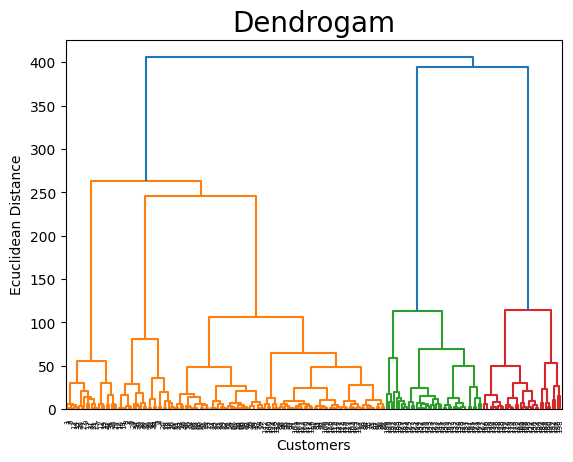

In [26]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Buat Dendrogram (Pohon Klaster)**

- sch.linkage(x, method='ward'): Menghitung jarak antar titik menggunakan metode Ward (meminimalkan variansi antar cluster).

- dendrogram(...): Menampilkan dendrogram (pohon pengelompokan bertingkat) untuk membantu memilih jumlah cluster optimal.

- Sumbu x = pelanggan, y = jarak antar cluster.

In [27]:
from sklearn.cluster import AgglomerativeClustering

# hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
hc = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

**Agglomerative Clustering**

Melakukan hierarchical clustering menggunakan metode agglomerative

- AgglomerativeClustering: metode bottom-up (dimulai dari tiap titik sebagai cluster terpisah, lalu digabung).

- n_clusters=9: kita pakai jumlah cluster 9 (bisa dipilih berdasarkan dendrogram).

- metric='euclidean': untuk menghitung jarak antar titik.

- linkage='ward': minimalkan variansi antar cluster saat menggabungkan.

- fit_predict(x): memproses data dan mengembalikan label untuk tiap data.


C:\Users\ahmad\AppData\Local\Temp\ipykernel_16316\3718218335.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


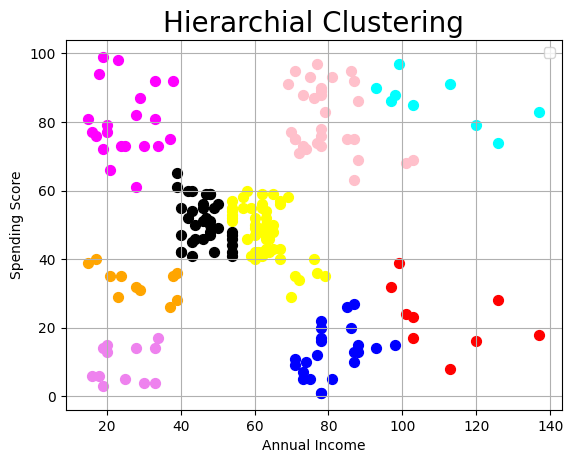

In [28]:

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Visualisasi Hasil Agglomerative Clustering**

Visualisasi hasil hierarchical clustering dalam bentuk scatter plot berwarna.

🔚 Ringkasan Alur
1. Data dipilih: hanya fitur Income dan SpendScore.

2. DBSCAN:

    - Mencari area dengan kepadatan tinggi (core points).

    - Outlier ditandai sebagai -1.

    - Visualisasi hasil clustering.

3. Hierarchical Clustering:

    - Dendrogram digunakan untuk bantu memilih jumlah cluster.

    - Clustering dilakukan secara bottom-up menggunakan metode Ward.

    - Hasil divisualisasikan untuk membandingkan bentuk cluster.